### Problem statement:
We have an "iris dataset" in which we are going to perform classification.

The columns in this dataset are:
* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species , respectively.

Here, Let's say X(Input) : Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, and PetalWidthCm as our input columns these are called 'features' whereas

 Y(Output) : Species is our output, also called 'target/label', which we will predict.

### Understanding our Data:
* How does the data look like
* How big is our data
* What are the datatypes of various columns
* Are there any missing values
* How does data look mathematically
* How is the correlation between columns

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# How does our data look alike
# Here we have our dataset in the form of a CSV 
df = pd.read_csv('iris_dataset/iris.csv') # for reading CSV file 
df.head() #here it can only show up to first 5 rows by default 

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Here as we see above there is no column names specified in dataset so, adding column name as specified above  

In [5]:
df.columns = ['SepalLength','SepalWidth', 'PetalLength','PetalWidth','Species']
df.head() # giving names to the columns

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.sample(10) # It displays us a dataset with 10 different samples

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
135,6.3,3.4,5.6,2.4,Iris-virginica
20,5.1,3.7,1.5,0.4,Iris-setosa
139,6.7,3.1,5.6,2.4,Iris-virginica
122,6.3,2.7,4.9,1.8,Iris-virginica
144,6.7,3.0,5.2,2.3,Iris-virginica
52,5.5,2.3,4.0,1.3,Iris-versicolor
14,5.7,4.4,1.5,0.4,Iris-setosa
61,6.0,2.2,4.0,1.0,Iris-versicolor
75,6.8,2.8,4.8,1.4,Iris-versicolor
62,6.1,2.9,4.7,1.4,Iris-versicolor


In [7]:
df.shape # Here we have 149 rows and 5 column in our data 

(149, 5)

In [8]:
# What are the datatypes of various columns
df.info() # here we have 1 object i.e. string format and others as float i.e. in a numerical form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
# Are there any missing values
df.isnull().sum() # it will give sum of missing values in our various columns, 0 means no missing value

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [10]:
# How does data look mathematically (the statistical part which gives insights into our data onto which machine learning works)
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### converting species column values into numbers 
Let's specify some column vlaues:
* Iris-setosa as 0
* Iris-versicolor as 1
* Iris-virginica as 2

Here, we are using labelencoder transformer for more info checkout its documentation: 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [11]:
# Here we only have one column which is in string format as seen above
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

In [12]:
# LabelEncoder exists as a standalone class within the 'sklearn.preprocessing' module.
from sklearn.preprocessing import LabelEncoder #This transformer should be used to encode target values, i.e. y, and not the input X
le = LabelEncoder() # Encode target labels with a value between 0 and n_classes-1.
le.fit_transform(df.Species) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df['Species'] = le.fit_transform(df.Species) #assigning back the values of species column after transformation 
df.sample(10) # As you can see value gets transformed 

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
123,6.7,3.3,5.7,2.1,2
142,6.8,3.2,5.9,2.3,2
95,5.7,2.9,4.2,1.3,1
33,4.9,3.1,1.5,0.1,0
29,4.8,3.1,1.6,0.2,0
83,5.4,3.0,4.5,1.5,1
45,5.1,3.8,1.6,0.2,0
24,5.0,3.0,1.6,0.2,0
74,6.6,3.0,4.4,1.4,1
13,5.8,4.0,1.2,0.2,0


### Note: 
Here, In Machine Learning our Model only understands NUMBERS but our data includes a combination of numerical as well as categorical values.
talking about real-world scenarios datasets.
* Here as this dataset is very basic to work with at a beginner level (this dataset is clean small and simple to work with)
* we do not need to perform various aspects of 'ML workflow' such as data preprocessing, feature engineering, feature selection, etc.

 

### Exploratory Data Analysis (EDA)
Visualizing data or Graphical analysis 
* Histogram
* Boxplot
* pair plot
* Heatmap
* Scatter Plot with Different Species

#### Histogram  
* just like a bar plot but it gets divided values into bins

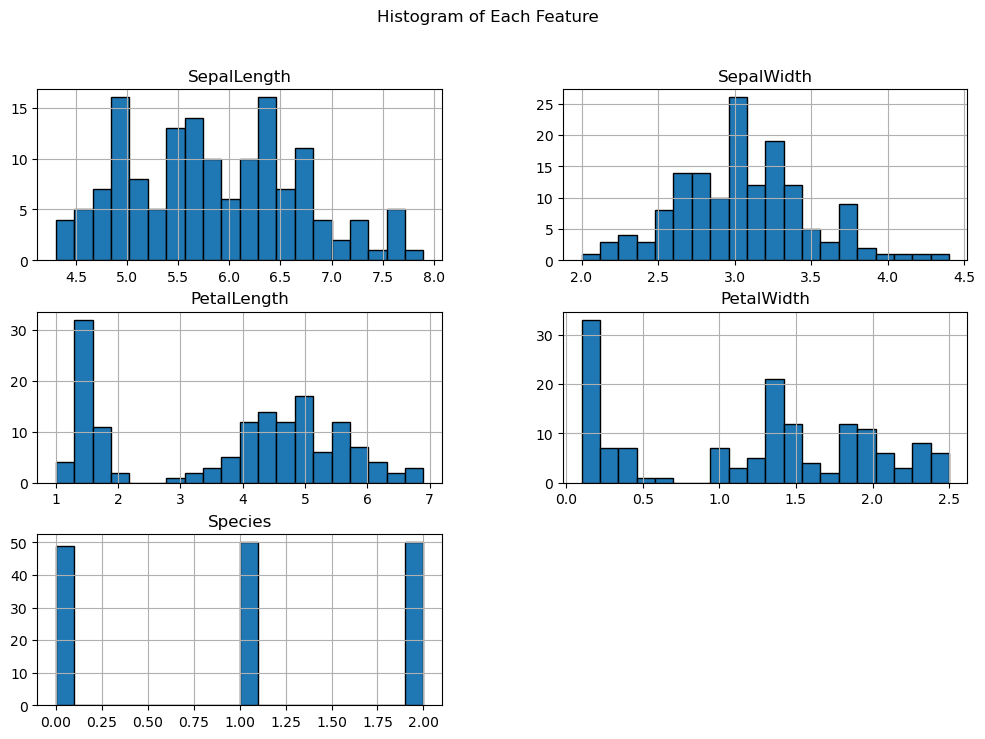

In [14]:
# let's see graph of various columns in dataset
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histogram of Each Feature')
plt.show() 

Through this visualization, we can conclude various aspects of the dataset such as,
we see above sepal width feature seems to be more useful to us as it is shaped like normal distribution and in statistics we know everything about pdf check it out:
https://en.wikipedia.org/wiki/Probability_density_function

#### Box Plot
* Box plots are useful for displaying the distribution of data and identifying outliers. 

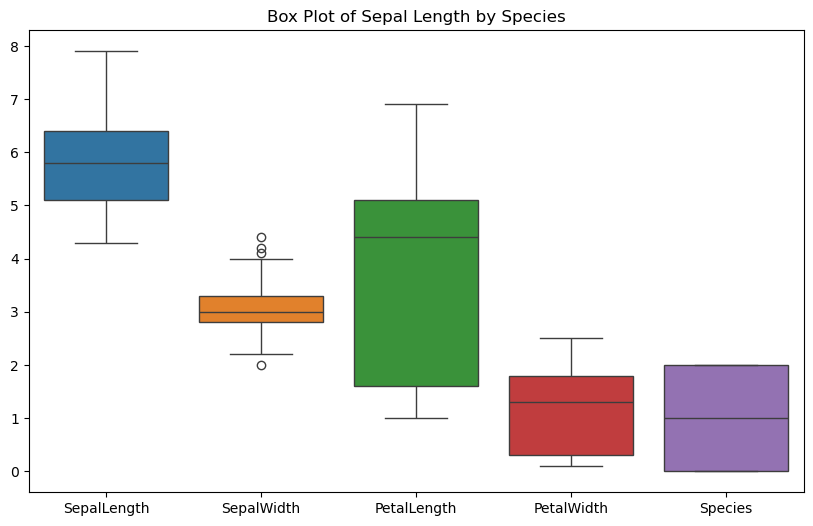

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

Here, As we see some circles above in the plot which gives an idea about outliers which means exceptions to our data

#### Pair pot
Pair plots visualize the pairwise relationships between features and the distribution of each features

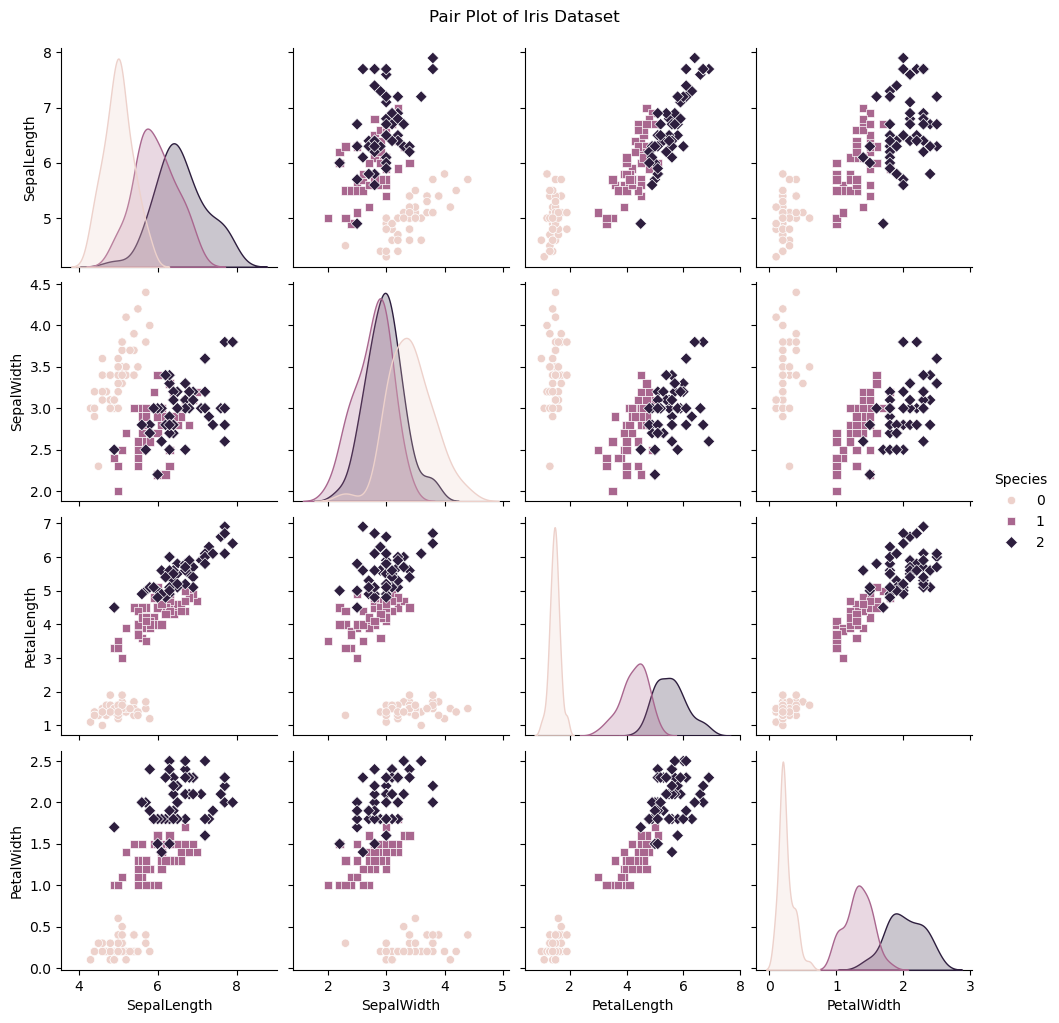

In [16]:
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


#### Heatmap
A heatmap can display the correlation matrix to show the relationships between features

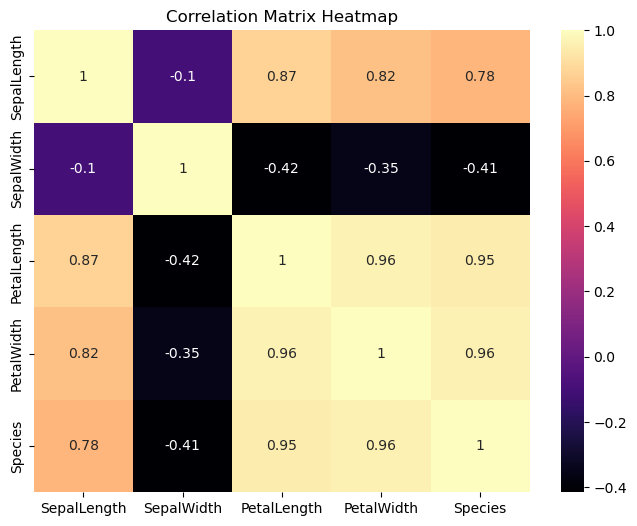

In [17]:
# Calculate correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True,cmap='magma')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Scatter Plot with Different Species
Scatter plots help in visualizing the relationship between two features and can be colored by species.

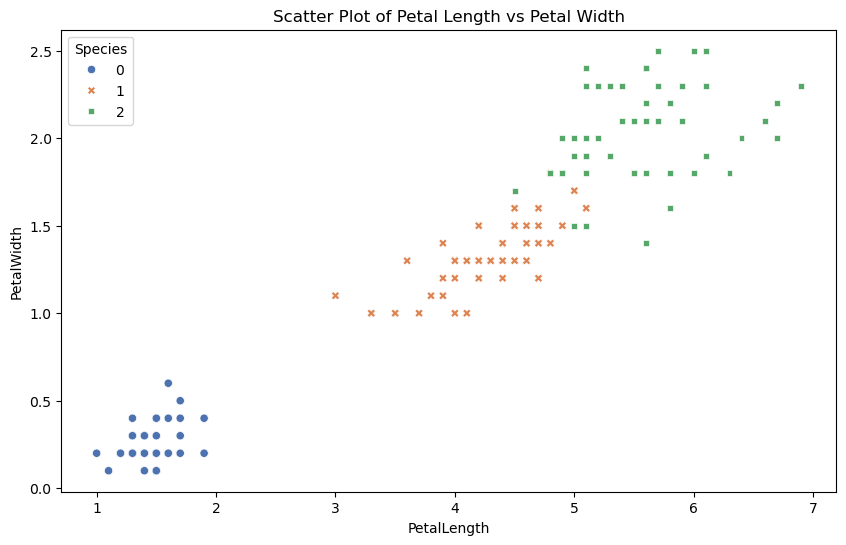

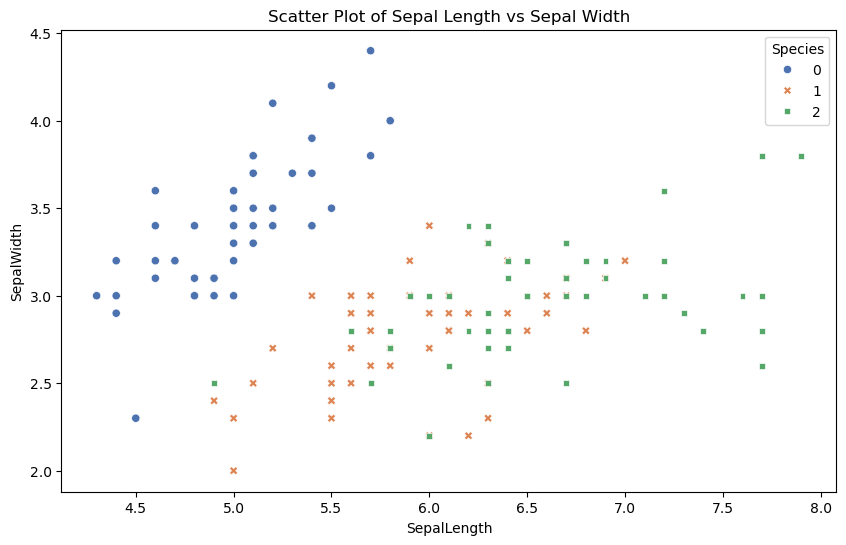

In [18]:
# Scatter plot for petal length vs petal width
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.PetalLength, y=df.PetalWidth, hue='Species', style='Species', palette='deep', data=df)
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

# Scatter plot for sepal length vs sepal width
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.SepalLength, y=df.SepalWidth, hue='Species', style='Species', palette='deep', data=df)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

### These visualizations can help in understanding the dataset better and in performing exploratory data analysis (EDA) before building machine learning models.

### Splitting our data into train and test:
Here in this section we are going to define our x and y as specify at the top and then perform train test split on our dataset

In [19]:
X = df.drop(columns=['Species'])# removing species and taking other festures as input 
y = df.iloc[:,-1] # taking species as output

In [20]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: Species, Length: 149, dtype: int32

In [78]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

### Performing Modeling:
Here in this section, we're going to train and evaluate our models 

In [115]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Support Vector Machine': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression()
}

In [116]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predict the test set
        y_pred = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [117]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Random Forest': 0.9466666666666667,
 'K-Nearest Neighbors': 0.9733333333333334,
 'Support Vector Machine': 0.9466666666666667,
 'Logistic Regression': 0.9466666666666667}

In [135]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
 

In [136]:
cv_scores = cross_val_score(model, X, y, cv=2)  # 2-fold cross-validation

In [137]:
(y_pred,np.array(y_test))

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0,
        0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 1]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 1]))

In [138]:
print(f"Average cross-validation score: {np.mean(cv_scores)}")

Average cross-validation score: 0.9528828828828829


In [139]:
print(f"Accuracy of k-NN model: {accuracy}")

Accuracy of k-NN model: 0.9733333333333334
